In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts


In [36]:
# Pull data for data frames

# John Hopkins Covid-19 Data
JH_df=pd.read_csv("Resources/jh_cases_deaths.csv")

JH_df.head()

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
0,2020-10-24 15:24:25 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001.0,32.539527,-86.644082,Medium metro,55200.0,2048,3710.14,31,56.16
1,2020-10-24 15:24:25 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003.0,30.727750,-87.722071,Small metro,208107.0,6637,3189.22,69,33.16
2,2020-10-24 15:24:25 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005.0,31.868263,-85.387129,Non-core,25782.0,1031,3998.91,9,34.91
3,2020-10-24 15:24:25 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007.0,32.996421,-87.125115,Large fringe metro,22527.0,828,3675.59,14,62.15
4,2020-10-24 15:24:25 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009.0,33.982109,-86.567906,Large fringe metro,57645.0,1925,3339.40,25,43.37


In [3]:
#Clean Up Data

#Merge Counties to show only states
JH_totalpop_df=JH_df.groupby(["state"]).sum()[["total_population","confirmed","deaths"]]
JH_totalpop_df.head()

,total_population,confirmed,deaths
state,,,
Alabama,4864680.0,183276,2866
Alaska,736384.0,12113,68
Arizona,6946685.0,235882,5865
Arkansas,2990671.0,104135,1782
California,39148760.0,899799,17317


In [35]:
# Unemployment Rates: National

UnRate_National_df=pd.read_csv("Resources/UNRATE.csv")

UnRate_National_df.head()

,DATE,UNRATE
0,1/1/1948,3.4
1,2/1/1948,3.8
2,3/1/1948,4.0
3,4/1/1948,3.9
4,5/1/1948,3.5


In [5]:
#Adjusting the DATE column
pd.to_datetime(UnRate_National_df["DATE"])

UnRate_National_df["DATE"]=pd.to_datetime(UnRate_National_df["DATE"])

#UnRate_National_df["DATE"].dt.year

In [6]:
UnRate_National_df.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [34]:
#Clean Dates to match Colorado Data for 1990-2020
import datetime
UnRate_National_df_1990=UnRate_National_df[UnRate_National_df["DATE"] >= datetime.datetime(1990,1,1)]

#Rename Column
UnRate_National_df_1990=UnRate_National_df_1990.rename(columns={'UNRATE':'National Unemployment Rate'})

#Fixed indexing
UnRate_National_df_1990.reset_index(drop=True, inplace=True)

UnRate_National_df_1990.head()

,DATE,National Unemployment Rate
0,1990-01-01,5.4
1,1990-02-01,5.3
2,1990-03-01,5.2
3,1990-04-01,5.4
4,1990-05-01,5.4


In [33]:
# Unemplyment Rates: Colorado
UnRate_Colorado_df=pd.read_csv("Resources/COLO808UR.csv")

pd.to_datetime(UnRate_Colorado_df["DATE"])
UnRate_Colorado_df["DATE"]=pd.to_datetime(UnRate_Colorado_df["DATE"])

#Rename columns
UnRate_Colorado_df=UnRate_Colorado_df.rename(columns={'COLO808UR':'Colorado Unemployment Rate'})

UnRate_Colorado_df.head()

,DATE,Colorado Unemployment Rate
0,1990-01-01,7.2
1,1990-02-01,7.2
2,1990-03-01,7.2
3,1990-04-01,7.1
4,1990-05-01,7.1


In [37]:
# Merge data Colorado Unemployment and National Unemployment
UnRate_joined_df=UnRate_National_df_1990.merge(UnRate_Colorado_df, on="DATE")

#Set Index
# UnRate_joined_df=UnRate_joined_df.set_index("DATE")

#Print
UnRate_joined_df

,DATE,National Unemployment Rate,Colorado Unemployment Rate
0,1990-01-01,5.4,7.2
1,1990-02-01,5.3,7.2
2,1990-03-01,5.2,7.2
3,1990-04-01,5.4,7.1
4,1990-05-01,5.4,7.1
...,...,...,...
363,2020-04-01,14.7,12.6
364,2020-05-01,13.3,9.9
365,2020-06-01,11.1,10.3
366,2020-07-01,10.2,6.8


In [80]:
#Percent Confirmed cases to total population Covid for National Cases

JH_Percent_Confirmed_df=[round((JH_totalpop_df["confirmed"]/JH_totalpop_df["total_population"])*100, 2)]

JH_Percent_Confirmed_df

[state
 Alabama                 3.77
 Alaska                  1.64
 Arizona                 3.40
 Arkansas                3.48
 California              2.30
 Colorado                1.66
 Connecticut             1.84
 Delaware                2.49
 District of Columbia    2.44
 Florida                 3.77
 Georgia                 3.38
 Hawaii                  1.02
 Idaho                   3.42
 Illinois                2.88
 Indiana                 2.38
 Iowa                    3.65
 Kansas                  2.58
 Kentucky                2.11
 Louisiana               3.84
 Maine                   0.46
 Maryland                2.32
 Massachusetts           2.18
 Michigan                1.73
 Minnesota               2.35
 Mississippi             3.85
 Missouri                2.75
 Montana                 2.54
 Nebraska                3.28
 Nevada                  3.20
 New Hampshire           0.75
 New Jersey              2.56
 New Mexico              1.92
 New York                2.51
 No

In [ ]:
#Percent Deaths to total population Covid for National Cases


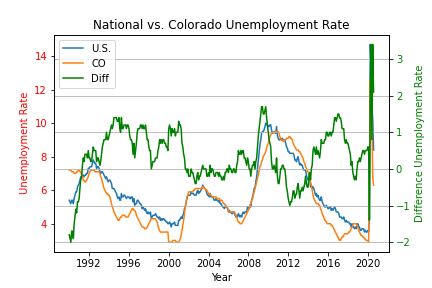

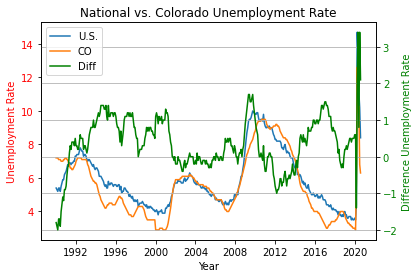

In [27]:
# Compare National Unemployment to Colorado Unemployment
# Line Plot

# plt.plot(UnRate_joined_df["DATE"], UnRate_joined_df["National Unemployment Rate"])
# plt.plot(UnRate_joined_df["DATE"], UnRate_joined_df["Colorado Unemployment Rate"])

Difference=UnRate_joined_df["National Unemployment Rate"]- UnRate_joined_df["Colorado Unemployment Rate"]

fig, ax1 = plt.subplots()
lns1=ax1.plot(UnRate_joined_df["DATE"], UnRate_joined_df["National Unemployment Rate"],label="U.S.")
lns2=ax1.plot(UnRate_joined_df["DATE"], UnRate_joined_df["Colorado Unemployment Rate"],label="CO")


ax1.tick_params(axis='y', labelcolor="red")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
lns3=ax2.plot(UnRate_joined_df["DATE"], Difference, color="green", label="Diff")
ax2.tick_params(axis='y', labelcolor="green")


plt.title("National vs. Colorado Unemployment Rate")
ax1.set_ylabel("Unemployment Rate",color="red")
ax2.set_ylabel("Difference Unemployment Rate",color="green")
ax1.set_xlabel("Year")

# Legend
# ax1.legend(loc="upper left")
# ax2.legend(loc="upper left")

#Combine legends for both axes
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

plt.grid()

#Save Image
plt.savefig('National_and_Colorado_UnemploymentRates.png')
from IPython.display import Image
Image('National_and_Colorado_UnemploymentRates.png')

In [12]:
#Pull out 2020 National Unemployment Data
UnRate_National_df_2020=UnRate_National_df[UnRate_National_df["DATE"] >= datetime.datetime(2020,1,1)]

#Rename Column
UnRate_National_df_2020=UnRate_National_df_2020.rename(columns={'UNRATE':'2020 National Unemployment Rate'})

#Fixed indexing
UnRate_National_df_2020.reset_index(drop=True, inplace=True)

UnRate_National_df_2020

,DATE,2020 National Unemployment Rate
0,2020-01-01,3.6
1,2020-02-01,3.5
2,2020-03-01,4.4
3,2020-04-01,14.7
4,2020-05-01,13.3
5,2020-06-01,11.1
6,2020-07-01,10.2
7,2020-08-01,8.4
8,2020-09-01,7.9


In [49]:
#Pull out 2020 Colorado Unemployment Data
UnRate_Colorado_df_2020=UnRate_Colorado_df[UnRate_Colorado_df["DATE"] >= datetime.datetime(2020,1,1)]

#Rename Column
UnRate_Colorado_df_2020=UnRate_Colorado_df_2020.rename(columns={'Colorado Unemployment Rate':'2020 Colorado Unemployment Rate'})

#Fixed indexing
UnRate_Colorado_df_2020.reset_index(drop=True, inplace=True)

UnRate_Colorado_df_2020

,DATE,2020 Colorado Unemployment Rate
0,2020-01-01,3.0
1,2020-02-01,2.9
2,2020-03-01,5.8
3,2020-04-01,12.6
4,2020-05-01,9.9
5,2020-06-01,10.3
6,2020-07-01,6.8
7,2020-08-01,6.3


In [57]:
# Merge data 2020 Colorado Unemployment and National Unemployment
UnRate_joined_df_2020=UnRate_National_df_2020.merge(UnRate_Colorado_df_2020, on="DATE")

#Rename Date as month


#Print
UnRate_joined_df_2020

,DATE,2020 National Unemployment Rate,2020 Colorado Unemployment Rate
0,2020-01-01,3.6,3.0
1,2020-02-01,3.5,2.9
2,2020-03-01,4.4,5.8
3,2020-04-01,14.7,12.6
4,2020-05-01,13.3,9.9
5,2020-06-01,11.1,10.3
6,2020-07-01,10.2,6.8
7,2020-08-01,8.4,6.3


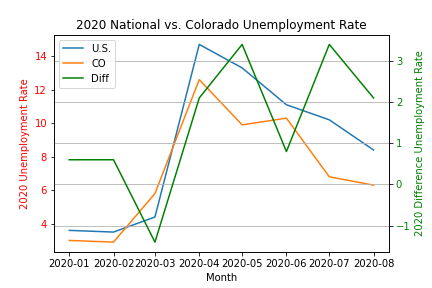

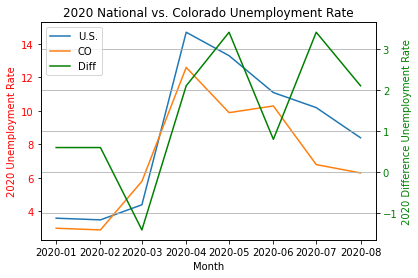

In [58]:
# Compare 2020 National Unemployment to Colorado Unemployment
# Line Plot

# plt.plot(UnRate_joined_df["DATE"], UnRate_joined_df["2020 National Unemployment Rate"])
# plt.plot(UnRate_joined_df["DATE"], UnRate_joined_df["2020 Colorado Unemployment Rate"])

Difference_2020=UnRate_joined_df_2020["2020 National Unemployment Rate"]- UnRate_joined_df_2020["2020 Colorado Unemployment Rate"]

fig, ax1 = plt.subplots()
lns1=ax1.plot(UnRate_joined_df_2020["DATE"], UnRate_joined_df_2020["2020 National Unemployment Rate"],label="U.S.")
lns2=ax1.plot(UnRate_joined_df_2020["DATE"], UnRate_joined_df_2020["2020 Colorado Unemployment Rate"],label="CO")


ax1.tick_params(axis='y', labelcolor="red")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
lns3=ax2.plot(UnRate_joined_df_2020["DATE"], Difference_2020, color="green", label="Diff")
ax2.tick_params(axis='y', labelcolor="green")


plt.title("2020 National vs. Colorado Unemployment Rate")
ax1.set_ylabel("2020 Unemployment Rate",color="red")
ax2.set_ylabel("2020 Difference Unemployment Rate",color="green")
ax1.set_xlabel("Month")

# Legend
# ax1.legend(loc="upper left")
# ax2.legend(loc="upper left")

#Combine legends for both axes
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)

plt.grid()

#Save Image
plt.savefig('2020_National_and_Colorado_UnemploymentRates.png')
from IPython.display import Image
Image('2020_National_and_Colorado_UnemploymentRates.png')

In [29]:
# Scatter Plot
# Create scatter plots, add a trendline, and print r-squared

def create_scatter(x_values, y_values, title, xlabel, ylabel, alpha):
    plt.scatter(x_values, y_values, alpha=alpha)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    slope, intercept, r_value, p_value, std_err = sts.linregress(x_values, y_values)
    plt.plot(x_values, x_values * slope + intercept)
    print(f"r-squared: {round(r_value ** 2, 3)}")
    
#And then calling it 

create_scatter(df['x column name'], df['y column name'], 'Thing 1 vs Thing 2', 'Thing 1, units', 'Thing 2, units', 0.5)

NameError: name 'df' is not defined

In [ ]:
# Compare National Unemployment with rise in Covid Cases


In [ ]:
# Compare Colorado Unemployment with rise in Colorado Covid Cases
